# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [2]:
# your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'grid', 'notebook'])


In [3]:
# load the data into a dataframe
df = pd.read_excel('OnlineRetail.xlsx')


In [35]:
# print the first 5 rows of the dataframe
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-2011,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-09-2011,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-2011,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-2011,4.15,12680.0,France,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12-09-2011,4.95,12680.0,France,14.85


In [15]:
# check the shape of the dataframe
df.shape


(397884, 9)

In [17]:
# check the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
 8   TotalPrice   397884 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [21]:
# chech duplicate rows
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (5192, 9)


In [23]:
# remove duplicate rows
df = df.drop_duplicates()
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 9)


In [25]:
# check missing values
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64


In [7]:
# //  Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
df.describe()

,Quantity,UnitPrice,CustomerID,TotalPrice
count,397884.000000,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453,22.397000
std,179.331775,22.097877,1713.141560,309.071041
min,1.000000,0.001000,12346.000000,0.001000
25%,2.000000,1.250000,13969.000000,4.680000
50%,6.000000,1.950000,15159.000000,11.800000
75%,12.000000,3.750000,16795.000000,19.800000
max,80995.000000,8142.750000,18287.000000,168469.600000


In [8]:
#// check how many unique values are there in each column
df.nunique()
df.head()

InvoiceNo      18532
StockCode       3665
Description     3877
Quantity         301
InvoiceDate    17282
UnitPrice        440
CustomerID      4338
Country           37
TotalPrice      2939
dtype: int64

1. which product are sell the most based on stock code
2. which time are sell the most and lest based on invoice date (time series)
3. which country have the most customer
4 which month of the year have higest sell


In [43]:
# change datetime format to DD-MM-YYYY
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.strftime('%Y-%m')
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12,3.39,17850.0,United Kingdom,20.34


In [62]:
# Preparing data for analysis and visualization
product = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
country = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)
monthly_sales = df.groupby(df['InvoiceDate'])['TotalPrice'].sum().reset_index()



   InvoiceDate   TotalPrice
0      2010-12   570422.730
1      2011-01   568101.310
2      2011-02   446084.920
3      2011-03   594081.760
4      2011-04   468374.331
5      2011-05   677355.150
6      2011-06   660046.050
7      2011-07   598962.901
8      2011-08   644051.040
9      2011-09   950690.202
10     2011-10  1035642.450
11     2011-11  1156205.610
12     2011-12   517190.440


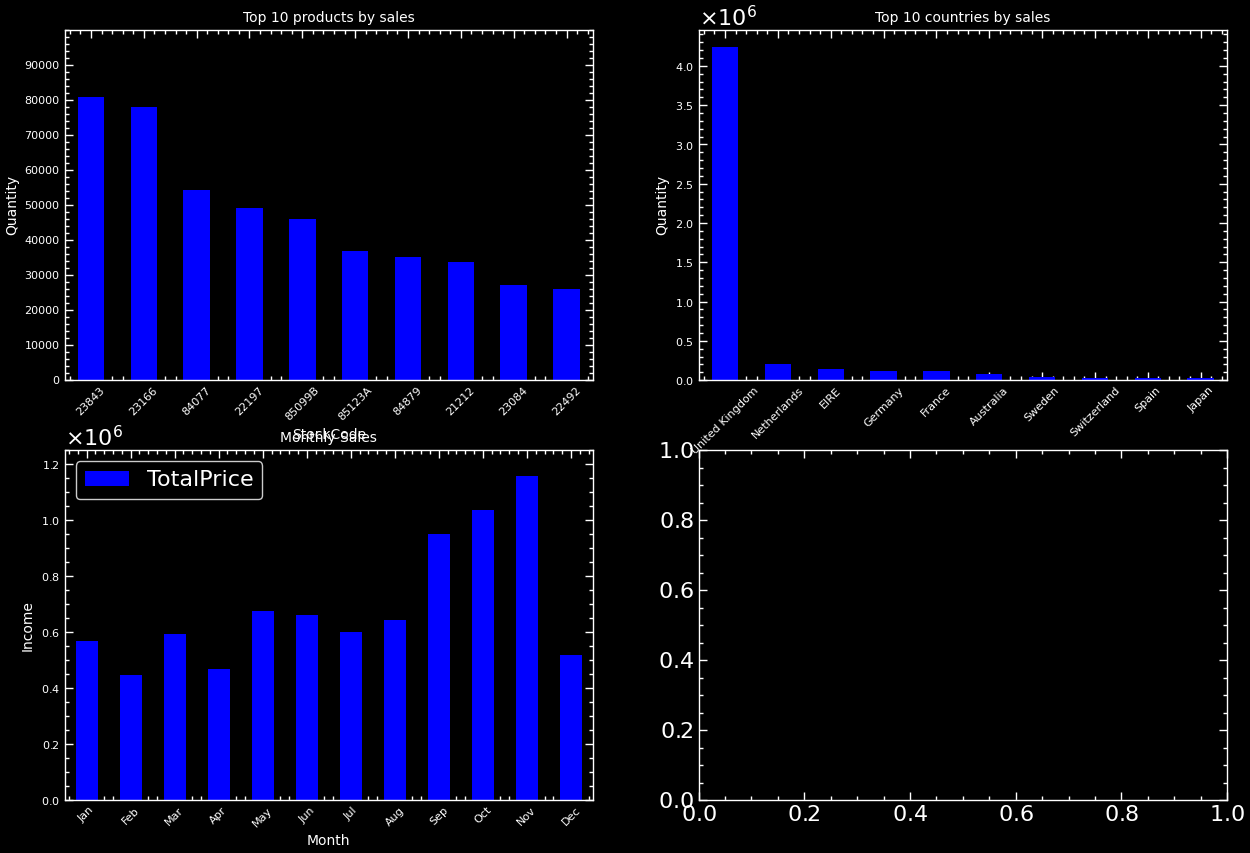

In [65]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# plot the top 10 products by sales
ax1 = product.plot(kind='bar', ax=axes[0][0], color='blue')
ax1.set_title('Top 10 products by sales', fontsize=10)
ax1.set_xlabel('StockCode', fontsize=10)
ax1.set_ylabel('Quantity', fontsize=10)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_ylim(0, 100000)
ax1.set_yticks(np.arange(0, 100000, 10000))
ax1.set_yticklabels(np.arange(0, 100000, 10000))
ax1.set_axisbelow(True)
ax1.grid(axis='y', linestyle='--')
ax1.tick_params(axis='both', labelsize=8)

# plot the top 10 countries by sales
ax2 = country.plot(kind='bar', ax=axes[0][1], color='blue')
ax2.set_title('Top 10 countries by sales', fontsize=10)
ax2.set_xlabel('Country', fontsize=10)
ax2.set_ylabel('Quantity', fontsize=10)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.tick_params(axis='both', labelsize=8)

# plot the monthly sales
ax4 = monthly_sales[1:].plot(kind='bar', ax=axes[1][0], color='blue')
ax4.set_title('Monthly Sales', fontsize=10)
ax4.set_xlabel('Month', fontsize=10)
ax4.set_ylabel('Income', fontsize=10)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec']
ax4.set_xticklabels(months, rotation=45)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45)
ax4.set_ylim(0, 1250000)
ax4.set_axisbelow(True)
ax4.grid(axis='y', linestyle='--')
ax4.tick_params(axis='both', labelsize=8)
